# Logistic Regression with Python


## Import Libraries

Let's import some libraries to get started!

In [51]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline 
sns.set_style('whitegrid')

## The Data

We will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic) downloaded as titanic_train.csv file

In [52]:
train = pd.read_csv('titanic_train.csv')

train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# Exploratory Data Analysis

Some exploratory data analysis! 

We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

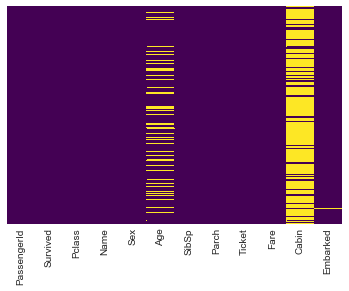

In [53]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# An assessment of data available, Age and Cabin have missing values while the rest
# are relatively OK.


#### Visualizing some more of the data

analysis by column. By Survival

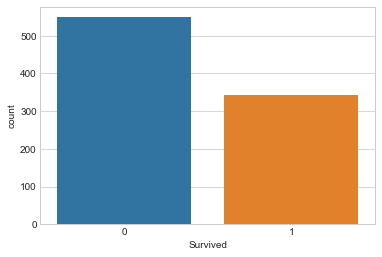

In [57]:
sns.countplot(x='Survived',data=train)

#### Survival by Gender

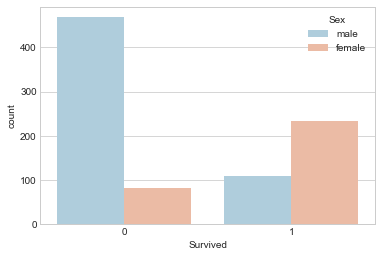

In [58]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

#### Survival by Passenger Class

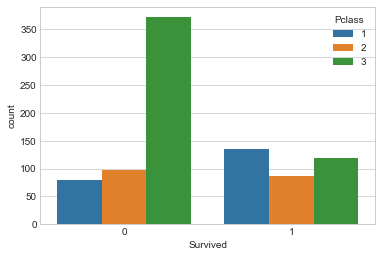

In [56]:
sns.countplot(x='Survived',hue='Pclass',data=train)

#### Distribution of Passengers on board by Age

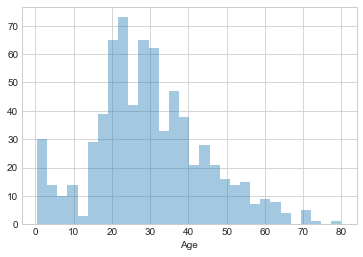

In [59]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

#### Passengers onboard with sibling(s) / spouse

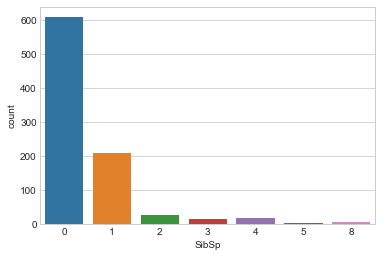

In [60]:
sns.countplot(x='SibSp',data=train)

#### Passengers by amount of fare paid

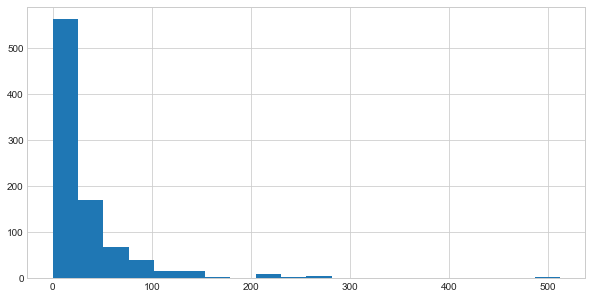

In [61]:
train['Fare'].hist(bins=20,figsize=(10,5))

# Data Cleaning

#### Imputation.  
    Filling out missing values by approximation
Filling in the mean age to the age column

Start of by checking the average age by passenger class.

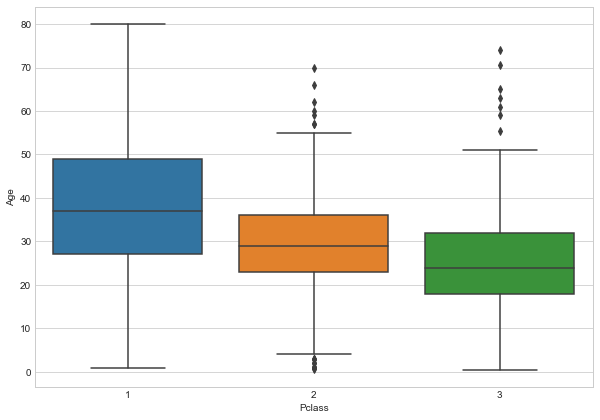

In [62]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

Wealthier passengers in the higher classes tend to be older, 

We'll use these average age values to impute missing data based on Pclass for Age.

In [64]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age
            

Apply `impute_age` function

In [66]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)


And by checking for missing values on our data, we have;

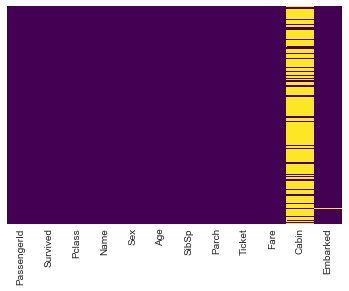

In [67]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


We can Drop the `Cabin` column as it possesses a huge percentage of missing values and filling
in may not be appropriatte. 

Also we will drop the few instances on the `Embarked` column


In [68]:
train.drop('Cabin',axis=1,inplace=True)

In [19]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [69]:
#drop missing row record from embarked column
train.dropna(inplace=True)

## Convert Categorical Features 

We need to convert categorical features to dummy variables using pandas,

Otherwise the learning algorithm won't be able to directly take in those features as inputs.

For the sex column, caterorize if passenger is male or not(1 | 0 )

On embarkment point it will be Q, S 0r C. 

In [70]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

embark = pd.get_dummies(train['Embarked'],drop_first=True)

#### Concatenate the generated categorical columns to the dataset 

In [22]:
train = pd.concat([train, sex,embark],axis=1)
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


#### Select Columns that we will use for the model

In [23]:
train.drop(['Name','Sex','Embarked','Ticket','PassengerId'],axis=1,inplace=True)


In [24]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


And the data is ready for our model!


# Building a Logistic Regression model

Start by splitting data into a training set and test set 


## Train Test Split



    X = These are the features we will use to predict

    y = Value we are predicting ie Did the passenger survive

In [25]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [29]:
from sklearn.cross_validation import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training and Predicting

In [32]:
from sklearn.linear_model import LogisticRegression


In [40]:
# create an instance of LR model
logmodel = LogisticRegression()

In [41]:
# train the model

logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
# predict using the model
predictions = logmodel.predict(X_test)

## Evaluate the Model

Using classification report, We can check :
    - precision
    - recall
    - f1-score 

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



A **confusion matrix** can also be applied 

in order to determine how many observations were correctly or incorrectly classified.

In [49]:
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 36,  68]])